In [16]:
!pip install six pypng

In [17]:
import PIL
from PIL import Image
from PIL import ImageFilter, ImageEnhance
import numpy as np
import matplotlib.pyplot as plt
import six
import pickle
import png
import os

In [18]:
def extractImagesAndLabels(path, file):
    f = open(path+file, 'rb')
    dict = pickle.load(f, encoding='latin1')
    images = dict['data']
    print (images.shape)
    #images = np.reshape(images, (10000, 3, 32, 32))
    #return as (10000, 3072)
    labels = dict['labels']
    return images, labels

images, labels = extractImagesAndLabels("data/CIFAR-10/cifar-10-batches-py/", "data_batch_1")

def extractCategories(path, file):
    f = open(path+file, 'rb')
    dict = pickle.load(f, encoding='latin1')
    return dict['label_names']

categories = extractCategories("data/CIFAR-10/cifar-10-batches-py/", "batches.meta")

def getImage(images, id):
    image = images[id]
    image = image.transpose([1, 2, 0])
    image = image.astype('float32')
    image /= 255
    return image

def showImage(id):
    image = getImage(images,id)
    %matplotlib inline
    imgplot = plt.imshow(image)
    labelid = labels[id]
    category = categories[labelid]
    print("category : "+category)  


(10000, 3072)


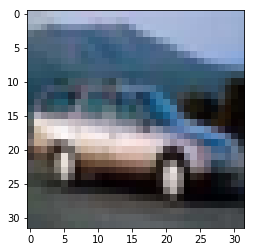

In [19]:
#Get data from cifar dataset
imagedata = images[4];

imagedata = imagedata.reshape((32, 32, 3), order='F').swapaxes(0,1)
image = Image.fromarray(imagedata)
image = image.convert('RGB')
image.save("./image-processing/test.png")


# #create png from data
# png.from_array(images[4].reshape((32, 32, 3), order='F').swapaxes(0,1), mode='RGB').save('out4.png')
# img = Image.open( 'out4.png' )
# img.load()
# #resize image
# img = img.resize((126, 126), Image.ANTIALIAS)

# #get data back from image
# data = np.asarray( img, dtype="int32" )
# #flatten data for storage
# data = data.flatten()

# #reshape the data as 126x126 RGB
# data = np.reshape(data, (126, 126, 3))
# #data = data.transpose([1, 2, 0])



%matplotlib inline
orig_img = Image.open( './image-processing/test.png' )
imgplot = plt.imshow(orig_img)

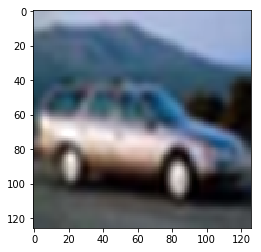

In [20]:
img = orig_img.resize((126, 126), Image.ANTIALIAS)
imgplot = plt.imshow(img)

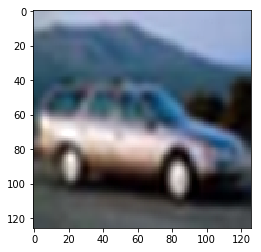

In [26]:
img = orig_img.resize((126, 126), Image.ANTIALIAS)
img = img.filter( ImageFilter.DETAIL )
imgplot = plt.imshow(img)

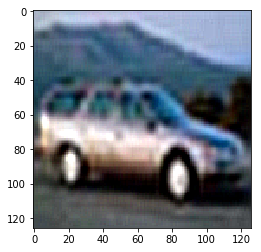

In [24]:
img = orig_img.resize((126, 126), Image.ANTIALIAS)
img = img.filter( ImageFilter.EDGE_ENHANCE_MORE )
imgplot = plt.imshow(img)